In [9]:
import gym

env = gym.make('BipedalWalker-v3')
observation = env.reset()

print("Observation space:", env.observation_space)
print("Action space:", env.action_space)


Observation space: Box([-3.1415927 -5.        -5.        -5.        -3.1415927 -5.
 -3.1415927 -5.        -0.        -3.1415927 -5.        -3.1415927
 -5.        -0.        -1.        -1.        -1.        -1.
 -1.        -1.        -1.        -1.        -1.        -1.       ], [3.1415927 5.        5.        5.        3.1415927 5.        3.1415927
 5.        5.        3.1415927 5.        3.1415927 5.        5.
 1.        1.        1.        1.        1.        1.        1.
 1.        1.        1.       ], (24,), float32)
Action space: Box(-1.0, 1.0, (4,), float32)


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [10]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

env = make_vec_env('BipedalWalker-v3', n_envs=4)

model = PPO('MlpPolicy', env, verbose=1)

print(model.policy)


Using cuda device
ActorCriticPolicy(
  (features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (pi_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (vf_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (mlp_extractor): MlpExtractor(
    (policy_net): Sequential(
      (0): Linear(in_features=24, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
    (value_net): Sequential(
      (0): Linear(in_features=24, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
  )
  (action_net): Linear(in_features=64, out_features=4, bias=True)
  (value_net): Linear(in_features=64, out_features=1, bias=True)
)


In [13]:
from stable_baselines3.common.callbacks import BaseCallback
from tqdm import tqdm

class TQDMProgressBarCallback(BaseCallback):
    def __init__(self, total_timesteps, verbose=0):
        super(TQDMProgressBarCallback, self).__init__(verbose)
        self.total_timesteps = total_timesteps
        self.pbar = None

    def _on_training_start(self):
        self.pbar = tqdm(total=self.total_timesteps, desc='Training Progress')

    def _on_step(self):
        self.pbar.update(1)
        return True

    def _on_training_end(self):
        self.pbar.close()


In [21]:
total_timesteps = 1000000

model = PPO('MlpPolicy', env, verbose=1)

callback = TQDMProgressBarCallback(total_timesteps=total_timesteps)

model.learn(total_timesteps=total_timesteps, callback=callback)

Using cuda device


Training Progress:   0%|          | 2014/1000000 [00:04<42:23, 392.37it/s]

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 410      |
|    ep_rew_mean     | -110     |
| time/              |          |
|    fps             | 1644     |
|    iterations      | 1        |
|    time_elapsed    | 4        |
|    total_timesteps | 8192     |
---------------------------------


Training Progress:   0%|          | 4061/1000000 [00:17<39:46, 417.24it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 422         |
|    ep_rew_mean          | -110        |
| time/                   |             |
|    fps                  | 948         |
|    iterations           | 2           |
|    time_elapsed         | 17          |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.006811135 |
|    clip_fraction        | 0.0576      |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.7        |
|    explained_variance   | -0.00898    |
|    learning_rate        | 0.0003      |
|    loss                 | 21.5        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00507    |
|    std                  | 1.01        |
|    value_loss           | 112         |
-----------------------------------------


Training Progress:   1%|          | 6128/1000000 [00:28<38:51, 426.23it/s]

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 455          |
|    ep_rew_mean          | -110         |
| time/                   |              |
|    fps                  | 853          |
|    iterations           | 3            |
|    time_elapsed         | 28           |
|    total_timesteps      | 24576        |
| train/                  |              |
|    approx_kl            | 0.0071011386 |
|    clip_fraction        | 0.0749       |
|    clip_range           | 0.2          |
|    entropy_loss         | -5.72        |
|    explained_variance   | 0.367        |
|    learning_rate        | 0.0003       |
|    loss                 | 33.9         |
|    n_updates            | 20           |
|    policy_gradient_loss | -0.0066      |
|    std                  | 1.01         |
|    value_loss           | 67.3         |
------------------------------------------


Training Progress:   1%|          | 8154/1000000 [00:40<38:59, 423.90it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 461         |
|    ep_rew_mean          | -110        |
| time/                   |             |
|    fps                  | 813         |
|    iterations           | 4           |
|    time_elapsed         | 40          |
|    total_timesteps      | 32768       |
| train/                  |             |
|    approx_kl            | 0.009804004 |
|    clip_fraction        | 0.118       |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.71       |
|    explained_variance   | 0.638       |
|    learning_rate        | 0.0003      |
|    loss                 | 30.3        |
|    n_updates            | 30          |
|    policy_gradient_loss | -0.00375    |
|    std                  | 1.01        |
|    value_loss           | 32.4        |
-----------------------------------------


Training Progress:   1%|          | 10229/1000000 [00:52<39:40, 415.72it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 471         |
|    ep_rew_mean          | -110        |
| time/                   |             |
|    fps                  | 777         |
|    iterations           | 5           |
|    time_elapsed         | 52          |
|    total_timesteps      | 40960       |
| train/                  |             |
|    approx_kl            | 0.009081424 |
|    clip_fraction        | 0.0449      |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.71       |
|    explained_variance   | 0.683       |
|    learning_rate        | 0.0003      |
|    loss                 | 22.1        |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.00394    |
|    std                  | 1.01        |
|    value_loss           | 33.3        |
-----------------------------------------


Training Progress:   1%|          | 12256/1000000 [01:04<41:03, 401.01it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 480         |
|    ep_rew_mean          | -110        |
| time/                   |             |
|    fps                  | 765         |
|    iterations           | 6           |
|    time_elapsed         | 64          |
|    total_timesteps      | 49152       |
| train/                  |             |
|    approx_kl            | 0.005858605 |
|    clip_fraction        | 0.0479      |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.7        |
|    explained_variance   | 0.774       |
|    learning_rate        | 0.0003      |
|    loss                 | 14.2        |
|    n_updates            | 50          |
|    policy_gradient_loss | -0.00374    |
|    std                  | 1           |
|    value_loss           | 27.2        |
-----------------------------------------


Training Progress:   1%|▏         | 14323/1000000 [01:16<39:57, 411.05it/s]

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 533          |
|    ep_rew_mean          | -110         |
| time/                   |              |
|    fps                  | 747          |
|    iterations           | 7            |
|    time_elapsed         | 76           |
|    total_timesteps      | 57344        |
| train/                  |              |
|    approx_kl            | 0.0063782404 |
|    clip_fraction        | 0.0549       |
|    clip_range           | 0.2          |
|    entropy_loss         | -5.68        |
|    explained_variance   | 0.835        |
|    learning_rate        | 0.0003       |
|    loss                 | 12.5         |
|    n_updates            | 60           |
|    policy_gradient_loss | -0.0044      |
|    std                  | 1            |
|    value_loss           | 27.5         |
------------------------------------------


Training Progress:   2%|▏         | 16358/1000000 [01:28<41:08, 398.46it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 565         |
|    ep_rew_mean          | -109        |
| time/                   |             |
|    fps                  | 742         |
|    iterations           | 8           |
|    time_elapsed         | 88          |
|    total_timesteps      | 65536       |
| train/                  |             |
|    approx_kl            | 0.008273566 |
|    clip_fraction        | 0.136       |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.64       |
|    explained_variance   | 0.833       |
|    learning_rate        | 0.0003      |
|    loss                 | 7.47        |
|    n_updates            | 70          |
|    policy_gradient_loss | -0.00258    |
|    std                  | 0.983       |
|    value_loss           | 12.3        |
-----------------------------------------


Training Progress:   2%|▏         | 18394/1000000 [01:39<39:09, 417.83it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 640         |
|    ep_rew_mean          | -108        |
| time/                   |             |
|    fps                  | 736         |
|    iterations           | 9           |
|    time_elapsed         | 100         |
|    total_timesteps      | 73728       |
| train/                  |             |
|    approx_kl            | 0.014208401 |
|    clip_fraction        | 0.116       |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.58       |
|    explained_variance   | 0.606       |
|    learning_rate        | 0.0003      |
|    loss                 | 3.38        |
|    n_updates            | 80          |
|    policy_gradient_loss | -0.0045     |
|    std                  | 0.971       |
|    value_loss           | 14          |
-----------------------------------------


Training Progress:   2%|▏         | 20461/1000000 [01:51<38:42, 421.85it/s]

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 701          |
|    ep_rew_mean          | -108         |
| time/                   |              |
|    fps                  | 732          |
|    iterations           | 10           |
|    time_elapsed         | 111          |
|    total_timesteps      | 81920        |
| train/                  |              |
|    approx_kl            | 0.0105566885 |
|    clip_fraction        | 0.146        |
|    clip_range           | 0.2          |
|    entropy_loss         | -5.47        |
|    explained_variance   | -0.124       |
|    learning_rate        | 0.0003       |
|    loss                 | 0.302        |
|    n_updates            | 90           |
|    policy_gradient_loss | -0.00353     |
|    std                  | 0.949        |
|    value_loss           | 0.224        |
------------------------------------------


Training Progress:   2%|▏         | 22518/1000000 [02:03<1:01:48, 263.55it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 747         |
|    ep_rew_mean          | -107        |
| time/                   |             |
|    fps                  | 729         |
|    iterations           | 11          |
|    time_elapsed         | 123         |
|    total_timesteps      | 90112       |
| train/                  |             |
|    approx_kl            | 0.009910469 |
|    clip_fraction        | 0.133       |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.38       |
|    explained_variance   | -0.182      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00168    |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.00796    |
|    std                  | 0.923       |
|    value_loss           | 0.0762      |
-----------------------------------------


Training Progress:   2%|▏         | 24553/1000000 [02:14<53:18, 304.97it/s]

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 807        |
|    ep_rew_mean          | -105       |
| time/                   |            |
|    fps                  | 730        |
|    iterations           | 12         |
|    time_elapsed         | 134        |
|    total_timesteps      | 98304      |
| train/                  |            |
|    approx_kl            | 0.01128952 |
|    clip_fraction        | 0.115      |
|    clip_range           | 0.2        |
|    entropy_loss         | -5.3       |
|    explained_variance   | -0.0671    |
|    learning_rate        | 0.0003     |
|    loss                 | 0.133      |
|    n_updates            | 110        |
|    policy_gradient_loss | -0.00498   |
|    std                  | 0.905      |
|    value_loss           | 2.13       |
----------------------------------------


Training Progress:   3%|▎         | 26588/1000000 [02:25<39:02, 415.53it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 868         |
|    ep_rew_mean          | -103        |
| time/                   |             |
|    fps                  | 731         |
|    iterations           | 13          |
|    time_elapsed         | 145         |
|    total_timesteps      | 106496      |
| train/                  |             |
|    approx_kl            | 0.008745266 |
|    clip_fraction        | 0.111       |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.25       |
|    explained_variance   | 0.0989      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0645      |
|    n_updates            | 120         |
|    policy_gradient_loss | -0.00704    |
|    std                  | 0.893       |
|    value_loss           | 2.66        |
-----------------------------------------


Training Progress:   3%|▎         | 28656/1000000 [02:37<37:56, 426.76it/s]

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 884        |
|    ep_rew_mean          | -102       |
| time/                   |            |
|    fps                  | 729        |
|    iterations           | 14         |
|    time_elapsed         | 157        |
|    total_timesteps      | 114688     |
| train/                  |            |
|    approx_kl            | 0.00966203 |
|    clip_fraction        | 0.136      |
|    clip_range           | 0.2        |
|    entropy_loss         | -5.18      |
|    explained_variance   | 0.492      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0577     |
|    n_updates            | 130        |
|    policy_gradient_loss | -0.00895   |
|    std                  | 0.881      |
|    value_loss           | 0.13       |
----------------------------------------


Training Progress:   3%|▎         | 30714/1000000 [02:48<37:21, 432.36it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 960         |
|    ep_rew_mean          | -99.2       |
| time/                   |             |
|    fps                  | 729         |
|    iterations           | 15          |
|    time_elapsed         | 168         |
|    total_timesteps      | 122880      |
| train/                  |             |
|    approx_kl            | 0.009397926 |
|    clip_fraction        | 0.112       |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.13       |
|    explained_variance   | 0.522       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0265      |
|    n_updates            | 140         |
|    policy_gradient_loss | -0.00908    |
|    std                  | 0.868       |
|    value_loss           | 0.116       |
-----------------------------------------


Training Progress:   3%|▎         | 32744/1000000 [02:59<38:29, 418.79it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.01e+03    |
|    ep_rew_mean          | -97         |
| time/                   |             |
|    fps                  | 727         |
|    iterations           | 16          |
|    time_elapsed         | 180         |
|    total_timesteps      | 131072      |
| train/                  |             |
|    approx_kl            | 0.010691548 |
|    clip_fraction        | 0.128       |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.04       |
|    explained_variance   | 0.668       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00607    |
|    n_updates            | 150         |
|    policy_gradient_loss | -0.01       |
|    std                  | 0.849       |
|    value_loss           | 0.0979      |
-----------------------------------------


Training Progress:   3%|▎         | 34800/1000000 [03:11<38:54, 413.53it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.07e+03    |
|    ep_rew_mean          | -94.8       |
| time/                   |             |
|    fps                  | 726         |
|    iterations           | 17          |
|    time_elapsed         | 191         |
|    total_timesteps      | 139264      |
| train/                  |             |
|    approx_kl            | 0.009547373 |
|    clip_fraction        | 0.127       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.98       |
|    explained_variance   | 0.374       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0195      |
|    n_updates            | 160         |
|    policy_gradient_loss | -0.00696    |
|    std                  | 0.836       |
|    value_loss           | 0.609       |
-----------------------------------------


Training Progress:   4%|▎         | 36835/1000000 [03:23<37:25, 428.98it/s]

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.1e+03    |
|    ep_rew_mean          | -92.7      |
| time/                   |            |
|    fps                  | 725        |
|    iterations           | 18         |
|    time_elapsed         | 203        |
|    total_timesteps      | 147456     |
| train/                  |            |
|    approx_kl            | 0.00935615 |
|    clip_fraction        | 0.111      |
|    clip_range           | 0.2        |
|    entropy_loss         | -4.9       |
|    explained_variance   | 0.817      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0551     |
|    n_updates            | 170        |
|    policy_gradient_loss | -0.00839   |
|    std                  | 0.82       |
|    value_loss           | 0.105      |
----------------------------------------


Training Progress:   4%|▍         | 38902/1000000 [03:34<37:14, 430.10it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.19e+03    |
|    ep_rew_mean          | -87.3       |
| time/                   |             |
|    fps                  | 724         |
|    iterations           | 19          |
|    time_elapsed         | 214         |
|    total_timesteps      | 155648      |
| train/                  |             |
|    approx_kl            | 0.012231296 |
|    clip_fraction        | 0.141       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.79       |
|    explained_variance   | 0.78        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0283      |
|    n_updates            | 180         |
|    policy_gradient_loss | -0.0115     |
|    std                  | 0.796       |
|    value_loss           | 0.121       |
-----------------------------------------


Training Progress:   4%|▍         | 40940/1000000 [03:46<40:55, 390.51it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.23e+03    |
|    ep_rew_mean          | -83.4       |
| time/                   |             |
|    fps                  | 723         |
|    iterations           | 20          |
|    time_elapsed         | 226         |
|    total_timesteps      | 163840      |
| train/                  |             |
|    approx_kl            | 0.010223166 |
|    clip_fraction        | 0.113       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.72       |
|    explained_variance   | 0.807       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.034       |
|    n_updates            | 190         |
|    policy_gradient_loss | -0.00802    |
|    std                  | 0.784       |
|    value_loss           | 0.137       |
-----------------------------------------


Training Progress:   4%|▍         | 42995/1000000 [03:57<53:31, 297.97it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.28e+03    |
|    ep_rew_mean          | -79.7       |
| time/                   |             |
|    fps                  | 723         |
|    iterations           | 21          |
|    time_elapsed         | 237         |
|    total_timesteps      | 172032      |
| train/                  |             |
|    approx_kl            | 0.011263365 |
|    clip_fraction        | 0.139       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.65       |
|    explained_variance   | 0.821       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0882      |
|    n_updates            | 200         |
|    policy_gradient_loss | -0.0101     |
|    std                  | 0.769       |
|    value_loss           | 0.157       |
-----------------------------------------


Training Progress:   5%|▍         | 45033/1000000 [04:08<37:12, 427.80it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.34e+03    |
|    ep_rew_mean          | -74.8       |
| time/                   |             |
|    fps                  | 724         |
|    iterations           | 22          |
|    time_elapsed         | 248         |
|    total_timesteps      | 180224      |
| train/                  |             |
|    approx_kl            | 0.012379373 |
|    clip_fraction        | 0.142       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.57       |
|    explained_variance   | 0.849       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0547      |
|    n_updates            | 210         |
|    policy_gradient_loss | -0.0118     |
|    std                  | 0.755       |
|    value_loss           | 0.152       |
-----------------------------------------


Training Progress:   5%|▍         | 47066/1000000 [04:20<35:57, 441.64it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.4e+03     |
|    ep_rew_mean          | -66.8       |
| time/                   |             |
|    fps                  | 724         |
|    iterations           | 23          |
|    time_elapsed         | 260         |
|    total_timesteps      | 188416      |
| train/                  |             |
|    approx_kl            | 0.011456436 |
|    clip_fraction        | 0.123       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.51       |
|    explained_variance   | -0.102      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.169       |
|    n_updates            | 220         |
|    policy_gradient_loss | -0.00589    |
|    std                  | 0.743       |
|    value_loss           | 3.82        |
-----------------------------------------


Training Progress:   5%|▍         | 49147/1000000 [04:32<36:30, 434.15it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.43e+03    |
|    ep_rew_mean          | -61.6       |
| time/                   |             |
|    fps                  | 721         |
|    iterations           | 24          |
|    time_elapsed         | 272         |
|    total_timesteps      | 196608      |
| train/                  |             |
|    approx_kl            | 0.012551054 |
|    clip_fraction        | 0.15        |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.41       |
|    explained_variance   | 0.844       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0841      |
|    n_updates            | 230         |
|    policy_gradient_loss | -0.0118     |
|    std                  | 0.726       |
|    value_loss           | 0.188       |
-----------------------------------------


Training Progress:   5%|▌         | 51166/1000000 [04:43<36:40, 431.25it/s]

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.46e+03   |
|    ep_rew_mean          | -56        |
| time/                   |            |
|    fps                  | 721        |
|    iterations           | 25         |
|    time_elapsed         | 284        |
|    total_timesteps      | 204800     |
| train/                  |            |
|    approx_kl            | 0.01121838 |
|    clip_fraction        | 0.144      |
|    clip_range           | 0.2        |
|    entropy_loss         | -4.34      |
|    explained_variance   | 0.875      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0802     |
|    n_updates            | 240        |
|    policy_gradient_loss | -0.0107    |
|    std                  | 0.714      |
|    value_loss           | 0.202      |
----------------------------------------


Training Progress:   5%|▌         | 53225/1000000 [04:55<38:07, 413.91it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.51e+03    |
|    ep_rew_mean          | -45.7       |
| time/                   |             |
|    fps                  | 720         |
|    iterations           | 26          |
|    time_elapsed         | 295         |
|    total_timesteps      | 212992      |
| train/                  |             |
|    approx_kl            | 0.012505146 |
|    clip_fraction        | 0.155       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.27       |
|    explained_variance   | 0.862       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0579      |
|    n_updates            | 250         |
|    policy_gradient_loss | -0.0119     |
|    std                  | 0.701       |
|    value_loss           | 0.202       |
-----------------------------------------


Training Progress:   6%|▌         | 55271/1000000 [05:07<35:48, 439.71it/s]

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.54e+03   |
|    ep_rew_mean          | -37.3      |
| time/                   |            |
|    fps                  | 720        |
|    iterations           | 27         |
|    time_elapsed         | 307        |
|    total_timesteps      | 221184     |
| train/                  |            |
|    approx_kl            | 0.01179821 |
|    clip_fraction        | 0.126      |
|    clip_range           | 0.2        |
|    entropy_loss         | -4.19      |
|    explained_variance   | 0.883      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0457     |
|    n_updates            | 260        |
|    policy_gradient_loss | -0.00722   |
|    std                  | 0.686      |
|    value_loss           | 0.215      |
----------------------------------------


Training Progress:   6%|▌         | 57314/1000000 [05:18<52:15, 300.62it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.54e+03    |
|    ep_rew_mean          | -31.2       |
| time/                   |             |
|    fps                  | 719         |
|    iterations           | 28          |
|    time_elapsed         | 318         |
|    total_timesteps      | 229376      |
| train/                  |             |
|    approx_kl            | 0.009552062 |
|    clip_fraction        | 0.127       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.12       |
|    explained_variance   | 0.889       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0871      |
|    n_updates            | 270         |
|    policy_gradient_loss | -0.00746    |
|    std                  | 0.675       |
|    value_loss           | 0.261       |
-----------------------------------------


Training Progress:   6%|▌         | 59389/1000000 [05:29<50:31, 310.29it/s]

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.54e+03   |
|    ep_rew_mean          | -22.7      |
| time/                   |            |
|    fps                  | 720        |
|    iterations           | 29         |
|    time_elapsed         | 329        |
|    total_timesteps      | 237568     |
| train/                  |            |
|    approx_kl            | 0.01104812 |
|    clip_fraction        | 0.138      |
|    clip_range           | 0.2        |
|    entropy_loss         | -4.05      |
|    explained_variance   | 0.893      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0885     |
|    n_updates            | 280        |
|    policy_gradient_loss | -0.00648   |
|    std                  | 0.664      |
|    value_loss           | 0.213      |
----------------------------------------


Training Progress:   6%|▌         | 61419/1000000 [05:40<36:33, 427.98it/s]

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.54e+03     |
|    ep_rew_mean          | -12.1        |
| time/                   |              |
|    fps                  | 721          |
|    iterations           | 30           |
|    time_elapsed         | 340          |
|    total_timesteps      | 245760       |
| train/                  |              |
|    approx_kl            | 0.0119559895 |
|    clip_fraction        | 0.137        |
|    clip_range           | 0.2          |
|    entropy_loss         | -3.97        |
|    explained_variance   | 0.903        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.0907       |
|    n_updates            | 290          |
|    policy_gradient_loss | -0.00676     |
|    std                  | 0.651        |
|    value_loss           | 0.188        |
------------------------------------------


Training Progress:   6%|▋         | 63482/1000000 [05:51<35:50, 435.58it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.52e+03    |
|    ep_rew_mean          | -5.15       |
| time/                   |             |
|    fps                  | 721         |
|    iterations           | 31          |
|    time_elapsed         | 352         |
|    total_timesteps      | 253952      |
| train/                  |             |
|    approx_kl            | 0.010687178 |
|    clip_fraction        | 0.128       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.91       |
|    explained_variance   | 0.501       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.111       |
|    n_updates            | 300         |
|    policy_gradient_loss | -0.00512    |
|    std                  | 0.641       |
|    value_loss           | 2.41        |
-----------------------------------------


Training Progress:   7%|▋         | 65496/1000000 [06:03<35:11, 442.49it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.52e+03    |
|    ep_rew_mean          | 2.26        |
| time/                   |             |
|    fps                  | 721         |
|    iterations           | 32          |
|    time_elapsed         | 363         |
|    total_timesteps      | 262144      |
| train/                  |             |
|    approx_kl            | 0.010665138 |
|    clip_fraction        | 0.0965      |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.89       |
|    explained_variance   | 0.874       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.764       |
|    n_updates            | 310         |
|    policy_gradient_loss | -0.00187    |
|    std                  | 0.641       |
|    value_loss           | 6.1         |
-----------------------------------------


Training Progress:   7%|▋         | 67548/1000000 [06:14<35:48, 434.04it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.51e+03    |
|    ep_rew_mean          | 13.7        |
| time/                   |             |
|    fps                  | 721         |
|    iterations           | 33          |
|    time_elapsed         | 374         |
|    total_timesteps      | 270336      |
| train/                  |             |
|    approx_kl            | 0.013907958 |
|    clip_fraction        | 0.159       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.84       |
|    explained_variance   | 0.804       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.143       |
|    n_updates            | 320         |
|    policy_gradient_loss | -0.00336    |
|    std                  | 0.632       |
|    value_loss           | 0.255       |
-----------------------------------------


Training Progress:   7%|▋         | 69613/1000000 [06:26<36:09, 428.83it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.51e+03    |
|    ep_rew_mean          | 22.2        |
| time/                   |             |
|    fps                  | 721         |
|    iterations           | 34          |
|    time_elapsed         | 386         |
|    total_timesteps      | 278528      |
| train/                  |             |
|    approx_kl            | 0.011547072 |
|    clip_fraction        | 0.128       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.8        |
|    explained_variance   | 0.897       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0521      |
|    n_updates            | 330         |
|    policy_gradient_loss | -0.00592    |
|    std                  | 0.625       |
|    value_loss           | 0.592       |
-----------------------------------------


Training Progress:   7%|▋         | 71678/1000000 [06:38<1:08:07, 227.13it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.52e+03    |
|    ep_rew_mean          | 29.4        |
| time/                   |             |
|    fps                  | 718         |
|    iterations           | 35          |
|    time_elapsed         | 398         |
|    total_timesteps      | 286720      |
| train/                  |             |
|    approx_kl            | 0.012693569 |
|    clip_fraction        | 0.157       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.72       |
|    explained_variance   | 0.904       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.11        |
|    n_updates            | 340         |
|    policy_gradient_loss | -0.00576    |
|    std                  | 0.614       |
|    value_loss           | 0.185       |
-----------------------------------------


Training Progress:   7%|▋         | 73685/1000000 [06:50<37:49, 408.11it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.5e+03     |
|    ep_rew_mean          | 37.4        |
| time/                   |             |
|    fps                  | 718         |
|    iterations           | 36          |
|    time_elapsed         | 410         |
|    total_timesteps      | 294912      |
| train/                  |             |
|    approx_kl            | 0.012414013 |
|    clip_fraction        | 0.136       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.66       |
|    explained_variance   | 0.909       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0668      |
|    n_updates            | 350         |
|    policy_gradient_loss | -0.0056     |
|    std                  | 0.604       |
|    value_loss           | 0.203       |
-----------------------------------------


Training Progress:   8%|▊         | 75759/1000000 [07:01<53:22, 288.59it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.5e+03     |
|    ep_rew_mean          | 45.1        |
| time/                   |             |
|    fps                  | 718         |
|    iterations           | 37          |
|    time_elapsed         | 421         |
|    total_timesteps      | 303104      |
| train/                  |             |
|    approx_kl            | 0.011225609 |
|    clip_fraction        | 0.135       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.61       |
|    explained_variance   | 0.841       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.253       |
|    n_updates            | 360         |
|    policy_gradient_loss | -0.00523    |
|    std                  | 0.597       |
|    value_loss           | 2.57        |
-----------------------------------------


Training Progress:   8%|▊         | 77794/1000000 [07:12<42:21, 362.83it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.5e+03     |
|    ep_rew_mean          | 51.1        |
| time/                   |             |
|    fps                  | 719         |
|    iterations           | 38          |
|    time_elapsed         | 432         |
|    total_timesteps      | 311296      |
| train/                  |             |
|    approx_kl            | 0.012387356 |
|    clip_fraction        | 0.165       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.57       |
|    explained_variance   | 0.708       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.143       |
|    n_updates            | 370         |
|    policy_gradient_loss | -0.00339    |
|    std                  | 0.592       |
|    value_loss           | 0.339       |
-----------------------------------------


Training Progress:   8%|▊         | 79868/1000000 [07:23<35:52, 427.39it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.48e+03    |
|    ep_rew_mean          | 56.7        |
| time/                   |             |
|    fps                  | 719         |
|    iterations           | 39          |
|    time_elapsed         | 444         |
|    total_timesteps      | 319488      |
| train/                  |             |
|    approx_kl            | 0.013513748 |
|    clip_fraction        | 0.163       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.54       |
|    explained_variance   | 0.916       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.123       |
|    n_updates            | 380         |
|    policy_gradient_loss | -0.00463    |
|    std                  | 0.589       |
|    value_loss           | 0.748       |
-----------------------------------------


Training Progress:   8%|▊         | 81878/1000000 [07:35<35:00, 437.01it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.44e+03    |
|    ep_rew_mean          | 60.1        |
| time/                   |             |
|    fps                  | 719         |
|    iterations           | 40          |
|    time_elapsed         | 455         |
|    total_timesteps      | 327680      |
| train/                  |             |
|    approx_kl            | 0.012571307 |
|    clip_fraction        | 0.153       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.52       |
|    explained_variance   | 0.854       |
|    learning_rate        | 0.0003      |
|    loss                 | 3.49        |
|    n_updates            | 390         |
|    policy_gradient_loss | -0.00366    |
|    std                  | 0.585       |
|    value_loss           | 5.08        |
-----------------------------------------


Training Progress:   8%|▊         | 83962/1000000 [07:46<37:06, 411.35it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.38e+03    |
|    ep_rew_mean          | 60.3        |
| time/                   |             |
|    fps                  | 719         |
|    iterations           | 41          |
|    time_elapsed         | 466         |
|    total_timesteps      | 335872      |
| train/                  |             |
|    approx_kl            | 0.010968659 |
|    clip_fraction        | 0.116       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.5        |
|    explained_variance   | 0.892       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.09        |
|    n_updates            | 400         |
|    policy_gradient_loss | -0.00235    |
|    std                  | 0.581       |
|    value_loss           | 12          |
-----------------------------------------


Training Progress:   9%|▊         | 86004/1000000 [07:58<36:02, 422.66it/s]

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.36e+03     |
|    ep_rew_mean          | 61.8         |
| time/                   |              |
|    fps                  | 719          |
|    iterations           | 42           |
|    time_elapsed         | 478          |
|    total_timesteps      | 344064       |
| train/                  |              |
|    approx_kl            | 0.0140076205 |
|    clip_fraction        | 0.148        |
|    clip_range           | 0.2          |
|    entropy_loss         | -3.47        |
|    explained_variance   | 0.846        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.681        |
|    n_updates            | 410          |
|    policy_gradient_loss | -0.00317     |
|    std                  | 0.579        |
|    value_loss           | 14.9         |
------------------------------------------


Training Progress:   9%|▉         | 88047/1000000 [08:10<35:02, 433.76it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.36e+03    |
|    ep_rew_mean          | 63.9        |
| time/                   |             |
|    fps                  | 717         |
|    iterations           | 43          |
|    time_elapsed         | 490         |
|    total_timesteps      | 352256      |
| train/                  |             |
|    approx_kl            | 0.018989518 |
|    clip_fraction        | 0.207       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.43       |
|    explained_variance   | 0.867       |
|    learning_rate        | 0.0003      |
|    loss                 | 5.7         |
|    n_updates            | 420         |
|    policy_gradient_loss | -0.00101    |
|    std                  | 0.57        |
|    value_loss           | 7.06        |
-----------------------------------------


Training Progress:   9%|▉         | 90102/1000000 [08:22<36:19, 417.48it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.36e+03    |
|    ep_rew_mean          | 67          |
| time/                   |             |
|    fps                  | 717         |
|    iterations           | 44          |
|    time_elapsed         | 502         |
|    total_timesteps      | 360448      |
| train/                  |             |
|    approx_kl            | 0.015509047 |
|    clip_fraction        | 0.212       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.37       |
|    explained_variance   | 0.908       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.305       |
|    n_updates            | 430         |
|    policy_gradient_loss | -0.00354    |
|    std                  | 0.564       |
|    value_loss           | 2.77        |
-----------------------------------------


Training Progress:   9%|▉         | 92131/1000000 [08:33<50:42, 298.42it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.36e+03    |
|    ep_rew_mean          | 70.4        |
| time/                   |             |
|    fps                  | 718         |
|    iterations           | 45          |
|    time_elapsed         | 513         |
|    total_timesteps      | 368640      |
| train/                  |             |
|    approx_kl            | 0.013963704 |
|    clip_fraction        | 0.174       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.32       |
|    explained_variance   | 0.699       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.418       |
|    n_updates            | 440         |
|    policy_gradient_loss | -0.00294    |
|    std                  | 0.556       |
|    value_loss           | 0.681       |
-----------------------------------------


Training Progress:   9%|▉         | 94167/1000000 [08:44<34:27, 438.09it/s]

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.35e+03   |
|    ep_rew_mean          | 71         |
| time/                   |            |
|    fps                  | 718        |
|    iterations           | 46         |
|    time_elapsed         | 524        |
|    total_timesteps      | 376832     |
| train/                  |            |
|    approx_kl            | 0.01396863 |
|    clip_fraction        | 0.192      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.23      |
|    explained_variance   | 0.761      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.115      |
|    n_updates            | 450        |
|    policy_gradient_loss | -0.00695   |
|    std                  | 0.542      |
|    value_loss           | 0.31       |
----------------------------------------


Training Progress:  10%|▉         | 96237/1000000 [08:55<34:18, 439.04it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.34e+03    |
|    ep_rew_mean          | 72.1        |
| time/                   |             |
|    fps                  | 718         |
|    iterations           | 47          |
|    time_elapsed         | 535         |
|    total_timesteps      | 385024      |
| train/                  |             |
|    approx_kl            | 0.013638339 |
|    clip_fraction        | 0.175       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.19       |
|    explained_variance   | 0.936       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0923      |
|    n_updates            | 460         |
|    policy_gradient_loss | -0.00491    |
|    std                  | 0.538       |
|    value_loss           | 1.23        |
-----------------------------------------


Training Progress:  10%|▉         | 98301/1000000 [09:07<34:51, 431.04it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.31e+03    |
|    ep_rew_mean          | 70.5        |
| time/                   |             |
|    fps                  | 718         |
|    iterations           | 48          |
|    time_elapsed         | 547         |
|    total_timesteps      | 393216      |
| train/                  |             |
|    approx_kl            | 0.014087413 |
|    clip_fraction        | 0.15        |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.17       |
|    explained_variance   | 0.948       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.156       |
|    n_updates            | 470         |
|    policy_gradient_loss | -0.00244    |
|    std                  | 0.535       |
|    value_loss           | 5.06        |
-----------------------------------------


Training Progress:  10%|█         | 100344/1000000 [09:18<36:39, 408.94it/s]

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.3e+03    |
|    ep_rew_mean          | 71.2       |
| time/                   |            |
|    fps                  | 718        |
|    iterations           | 49         |
|    time_elapsed         | 558        |
|    total_timesteps      | 401408     |
| train/                  |            |
|    approx_kl            | 0.01077004 |
|    clip_fraction        | 0.146      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.14      |
|    explained_variance   | 0.926      |
|    learning_rate        | 0.0003     |
|    loss                 | 1.46       |
|    n_updates            | 480        |
|    policy_gradient_loss | -0.000756  |
|    std                  | 0.532      |
|    value_loss           | 7.43       |
----------------------------------------


Training Progress:  10%|█         | 102387/1000000 [09:29<34:59, 427.48it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.3e+03     |
|    ep_rew_mean          | 72.9        |
| time/                   |             |
|    fps                  | 718         |
|    iterations           | 50          |
|    time_elapsed         | 569         |
|    total_timesteps      | 409600      |
| train/                  |             |
|    approx_kl            | 0.015575485 |
|    clip_fraction        | 0.164       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.11       |
|    explained_variance   | 0.925       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.1         |
|    n_updates            | 490         |
|    policy_gradient_loss | -0.00388    |
|    std                  | 0.528       |
|    value_loss           | 8.29        |
-----------------------------------------


Training Progress:  10%|█         | 104427/1000000 [09:41<33:47, 441.80it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.3e+03     |
|    ep_rew_mean          | 73.6        |
| time/                   |             |
|    fps                  | 718         |
|    iterations           | 51          |
|    time_elapsed         | 581         |
|    total_timesteps      | 417792      |
| train/                  |             |
|    approx_kl            | 0.014221617 |
|    clip_fraction        | 0.236       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.06       |
|    explained_variance   | 0.471       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.302       |
|    n_updates            | 500         |
|    policy_gradient_loss | -0.00313    |
|    std                  | 0.521       |
|    value_loss           | 0.713       |
-----------------------------------------


Training Progress:  11%|█         | 106489/1000000 [09:52<34:32, 431.18it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.29e+03    |
|    ep_rew_mean          | 73          |
| time/                   |             |
|    fps                  | 718         |
|    iterations           | 52          |
|    time_elapsed         | 592         |
|    total_timesteps      | 425984      |
| train/                  |             |
|    approx_kl            | 0.015340621 |
|    clip_fraction        | 0.189       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.04       |
|    explained_variance   | 0.951       |
|    learning_rate        | 0.0003      |
|    loss                 | 2.29        |
|    n_updates            | 510         |
|    policy_gradient_loss | -0.00112    |
|    std                  | 0.519       |
|    value_loss           | 1.99        |
-----------------------------------------


Training Progress:  11%|█         | 108524/1000000 [10:03<51:46, 287.00it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.29e+03    |
|    ep_rew_mean          | 75.2        |
| time/                   |             |
|    fps                  | 718         |
|    iterations           | 53          |
|    time_elapsed         | 604         |
|    total_timesteps      | 434176      |
| train/                  |             |
|    approx_kl            | 0.011861544 |
|    clip_fraction        | 0.128       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.03       |
|    explained_variance   | 0.945       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.361       |
|    n_updates            | 520         |
|    policy_gradient_loss | -0.00279    |
|    std                  | 0.52        |
|    value_loss           | 5.83        |
-----------------------------------------


Training Progress:  11%|█         | 110564/1000000 [10:14<33:51, 437.74it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.26e+03    |
|    ep_rew_mean          | 73          |
| time/                   |             |
|    fps                  | 719         |
|    iterations           | 54          |
|    time_elapsed         | 614         |
|    total_timesteps      | 442368      |
| train/                  |             |
|    approx_kl            | 0.014429959 |
|    clip_fraction        | 0.206       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.97       |
|    explained_variance   | 0.765       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0952      |
|    n_updates            | 530         |
|    policy_gradient_loss | -0.00423    |
|    std                  | 0.51        |
|    value_loss           | 0.379       |
-----------------------------------------


Training Progress:  11%|█▏        | 112629/1000000 [10:26<33:38, 439.71it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.3e+03     |
|    ep_rew_mean          | 81.8        |
| time/                   |             |
|    fps                  | 719         |
|    iterations           | 55          |
|    time_elapsed         | 626         |
|    total_timesteps      | 450560      |
| train/                  |             |
|    approx_kl            | 0.012359627 |
|    clip_fraction        | 0.133       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.97       |
|    explained_variance   | 0.922       |
|    learning_rate        | 0.0003      |
|    loss                 | 2.67        |
|    n_updates            | 540         |
|    policy_gradient_loss | -0.00285    |
|    std                  | 0.51        |
|    value_loss           | 5.12        |
-----------------------------------------


Training Progress:  11%|█▏        | 114659/1000000 [10:37<34:06, 432.64it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.31e+03    |
|    ep_rew_mean          | 84.9        |
| time/                   |             |
|    fps                  | 719         |
|    iterations           | 56          |
|    time_elapsed         | 637         |
|    total_timesteps      | 458752      |
| train/                  |             |
|    approx_kl            | 0.017651055 |
|    clip_fraction        | 0.218       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.94       |
|    explained_variance   | 0.267       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.142       |
|    n_updates            | 550         |
|    policy_gradient_loss | -0.00409    |
|    std                  | 0.507       |
|    value_loss           | 1.6         |
-----------------------------------------


Training Progress:  12%|█▏        | 116734/1000000 [10:48<32:39, 450.72it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.32e+03    |
|    ep_rew_mean          | 88.4        |
| time/                   |             |
|    fps                  | 719         |
|    iterations           | 57          |
|    time_elapsed         | 648         |
|    total_timesteps      | 466944      |
| train/                  |             |
|    approx_kl            | 0.014565993 |
|    clip_fraction        | 0.172       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.93       |
|    explained_variance   | 0.876       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.73        |
|    n_updates            | 560         |
|    policy_gradient_loss | -0.00297    |
|    std                  | 0.505       |
|    value_loss           | 5.67        |
-----------------------------------------


Training Progress:  12%|█▏        | 118771/1000000 [11:00<34:08, 430.15it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.35e+03    |
|    ep_rew_mean          | 94.9        |
| time/                   |             |
|    fps                  | 719         |
|    iterations           | 58          |
|    time_elapsed         | 660         |
|    total_timesteps      | 475136      |
| train/                  |             |
|    approx_kl            | 0.016172467 |
|    clip_fraction        | 0.189       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.9        |
|    explained_variance   | 0.855       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.364       |
|    n_updates            | 570         |
|    policy_gradient_loss | -0.00336    |
|    std                  | 0.5         |
|    value_loss           | 4.02        |
-----------------------------------------


Training Progress:  12%|█▏        | 120824/1000000 [11:11<34:03, 430.14it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.28e+03    |
|    ep_rew_mean          | 87.7        |
| time/                   |             |
|    fps                  | 719         |
|    iterations           | 59          |
|    time_elapsed         | 671         |
|    total_timesteps      | 483328      |
| train/                  |             |
|    approx_kl            | 0.016770305 |
|    clip_fraction        | 0.198       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.86       |
|    explained_variance   | 0.92        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.318       |
|    n_updates            | 580         |
|    policy_gradient_loss | -0.00159    |
|    std                  | 0.497       |
|    value_loss           | 2.34        |
-----------------------------------------


Training Progress:  12%|█▏        | 122874/1000000 [11:23<33:02, 442.51it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.23e+03    |
|    ep_rew_mean          | 82.1        |
| time/                   |             |
|    fps                  | 719         |
|    iterations           | 60          |
|    time_elapsed         | 683         |
|    total_timesteps      | 491520      |
| train/                  |             |
|    approx_kl            | 0.017716385 |
|    clip_fraction        | 0.161       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.86       |
|    explained_variance   | 0.893       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.38        |
|    n_updates            | 590         |
|    policy_gradient_loss | -0.00194    |
|    std                  | 0.498       |
|    value_loss           | 8.76        |
-----------------------------------------


Training Progress:  12%|█▏        | 124904/1000000 [11:34<50:40, 287.79it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.23e+03    |
|    ep_rew_mean          | 82.4        |
| time/                   |             |
|    fps                  | 719         |
|    iterations           | 61          |
|    time_elapsed         | 694         |
|    total_timesteps      | 499712      |
| train/                  |             |
|    approx_kl            | 0.018448181 |
|    clip_fraction        | 0.217       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.83       |
|    explained_variance   | 0.932       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.706       |
|    n_updates            | 600         |
|    policy_gradient_loss | -0.0013     |
|    std                  | 0.492       |
|    value_loss           | 5.38        |
-----------------------------------------


Training Progress:  13%|█▎        | 126958/1000000 [11:45<46:20, 314.02it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.24e+03    |
|    ep_rew_mean          | 86.2        |
| time/                   |             |
|    fps                  | 720         |
|    iterations           | 62          |
|    time_elapsed         | 705         |
|    total_timesteps      | 507904      |
| train/                  |             |
|    approx_kl            | 0.022653917 |
|    clip_fraction        | 0.215       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.8        |
|    explained_variance   | 0.925       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.47        |
|    n_updates            | 610         |
|    policy_gradient_loss | -0.000734   |
|    std                  | 0.488       |
|    value_loss           | 7.7         |
-----------------------------------------


Training Progress:  13%|█▎        | 128995/1000000 [11:57<33:56, 427.74it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.24e+03    |
|    ep_rew_mean          | 89          |
| time/                   |             |
|    fps                  | 719         |
|    iterations           | 63          |
|    time_elapsed         | 717         |
|    total_timesteps      | 516096      |
| train/                  |             |
|    approx_kl            | 0.020973323 |
|    clip_fraction        | 0.211       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.78       |
|    explained_variance   | 0.945       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.545       |
|    n_updates            | 620         |
|    policy_gradient_loss | -0.0014     |
|    std                  | 0.489       |
|    value_loss           | 5.02        |
-----------------------------------------


Training Progress:  13%|█▎        | 131046/1000000 [12:08<33:14, 435.76it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.23e+03    |
|    ep_rew_mean          | 89.9        |
| time/                   |             |
|    fps                  | 719         |
|    iterations           | 64          |
|    time_elapsed         | 728         |
|    total_timesteps      | 524288      |
| train/                  |             |
|    approx_kl            | 0.020007085 |
|    clip_fraction        | 0.251       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.76       |
|    explained_variance   | 0.927       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.72        |
|    n_updates            | 630         |
|    policy_gradient_loss | 0.00131     |
|    std                  | 0.484       |
|    value_loss           | 4.2         |
-----------------------------------------


Training Progress:  13%|█▎        | 133098/1000000 [12:20<32:58, 438.24it/s]

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.24e+03   |
|    ep_rew_mean          | 91.8       |
| time/                   |            |
|    fps                  | 719        |
|    iterations           | 65         |
|    time_elapsed         | 740        |
|    total_timesteps      | 532480     |
| train/                  |            |
|    approx_kl            | 0.01872779 |
|    clip_fraction        | 0.226      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.73      |
|    explained_variance   | 0.879      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.629      |
|    n_updates            | 640        |
|    policy_gradient_loss | 0.00125    |
|    std                  | 0.482      |
|    value_loss           | 3.05       |
----------------------------------------


Training Progress:  14%|█▎        | 135145/1000000 [12:31<34:12, 421.36it/s]

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1.23e+03  |
|    ep_rew_mean          | 94.8      |
| time/                   |           |
|    fps                  | 719       |
|    iterations           | 66        |
|    time_elapsed         | 751       |
|    total_timesteps      | 540672    |
| train/                  |           |
|    approx_kl            | 0.0155602 |
|    clip_fraction        | 0.207     |
|    clip_range           | 0.2       |
|    entropy_loss         | -2.68     |
|    explained_variance   | 0.951     |
|    learning_rate        | 0.0003    |
|    loss                 | 0.348     |
|    n_updates            | 650       |
|    policy_gradient_loss | -0.00157  |
|    std                  | 0.473     |
|    value_loss           | 2.55      |
---------------------------------------


Training Progress:  14%|█▎        | 137185/1000000 [12:42<33:31, 428.96it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.24e+03    |
|    ep_rew_mean          | 97.3        |
| time/                   |             |
|    fps                  | 719         |
|    iterations           | 67          |
|    time_elapsed         | 763         |
|    total_timesteps      | 548864      |
| train/                  |             |
|    approx_kl            | 0.015016972 |
|    clip_fraction        | 0.207       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.6        |
|    explained_variance   | 0.956       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.128       |
|    n_updates            | 660         |
|    policy_gradient_loss | -0.00431    |
|    std                  | 0.464       |
|    value_loss           | 1.58        |
-----------------------------------------


Training Progress:  14%|█▍        | 139225/1000000 [12:54<31:53, 449.73it/s]

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.22e+03   |
|    ep_rew_mean          | 96.3       |
| time/                   |            |
|    fps                  | 719        |
|    iterations           | 68         |
|    time_elapsed         | 774        |
|    total_timesteps      | 557056     |
| train/                  |            |
|    approx_kl            | 0.01866914 |
|    clip_fraction        | 0.196      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.53      |
|    explained_variance   | 0.951      |
|    learning_rate        | 0.0003     |
|    loss                 | 11.6       |
|    n_updates            | 670        |
|    policy_gradient_loss | -0.00494   |
|    std                  | 0.457      |
|    value_loss           | 1.83       |
----------------------------------------


Training Progress:  14%|█▍        | 141297/1000000 [13:05<46:04, 310.58it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.22e+03    |
|    ep_rew_mean          | 101         |
| time/                   |             |
|    fps                  | 719         |
|    iterations           | 69          |
|    time_elapsed         | 785         |
|    total_timesteps      | 565248      |
| train/                  |             |
|    approx_kl            | 0.016629387 |
|    clip_fraction        | 0.182       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.51       |
|    explained_variance   | 0.952       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.353       |
|    n_updates            | 680         |
|    policy_gradient_loss | -0.00374    |
|    std                  | 0.456       |
|    value_loss           | 3.96        |
-----------------------------------------


Training Progress:  14%|█▍        | 143354/1000000 [13:16<44:47, 318.75it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.21e+03    |
|    ep_rew_mean          | 99.5        |
| time/                   |             |
|    fps                  | 719         |
|    iterations           | 70          |
|    time_elapsed         | 796         |
|    total_timesteps      | 573440      |
| train/                  |             |
|    approx_kl            | 0.016150128 |
|    clip_fraction        | 0.187       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.5        |
|    explained_variance   | 0.952       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.186       |
|    n_updates            | 690         |
|    policy_gradient_loss | -0.00121    |
|    std                  | 0.454       |
|    value_loss           | 4.47        |
-----------------------------------------


Training Progress:  15%|█▍        | 145368/1000000 [13:27<32:39, 436.18it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.24e+03    |
|    ep_rew_mean          | 106         |
| time/                   |             |
|    fps                  | 720         |
|    iterations           | 71          |
|    time_elapsed         | 807         |
|    total_timesteps      | 581632      |
| train/                  |             |
|    approx_kl            | 0.012955502 |
|    clip_fraction        | 0.167       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.48       |
|    explained_variance   | 0.911       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.62        |
|    n_updates            | 700         |
|    policy_gradient_loss | -0.00273    |
|    std                  | 0.454       |
|    value_loss           | 5.64        |
-----------------------------------------


Training Progress:  15%|█▍        | 147442/1000000 [13:38<32:09, 441.80it/s]

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.25e+03   |
|    ep_rew_mean          | 112        |
| time/                   |            |
|    fps                  | 720        |
|    iterations           | 72         |
|    time_elapsed         | 819        |
|    total_timesteps      | 589824     |
| train/                  |            |
|    approx_kl            | 0.02088204 |
|    clip_fraction        | 0.249      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.42      |
|    explained_variance   | 0.554      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.325      |
|    n_updates            | 710        |
|    policy_gradient_loss | -0.000573  |
|    std                  | 0.446      |
|    value_loss           | 0.729      |
----------------------------------------


Training Progress:  15%|█▍        | 149473/1000000 [13:50<32:01, 442.69it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.27e+03    |
|    ep_rew_mean          | 116         |
| time/                   |             |
|    fps                  | 720         |
|    iterations           | 73          |
|    time_elapsed         | 830         |
|    total_timesteps      | 598016      |
| train/                  |             |
|    approx_kl            | 0.014423306 |
|    clip_fraction        | 0.19        |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.38       |
|    explained_variance   | 0.848       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.197       |
|    n_updates            | 720         |
|    policy_gradient_loss | -0.00422    |
|    std                  | 0.441       |
|    value_loss           | 0.562       |
-----------------------------------------


Training Progress:  15%|█▌        | 151546/1000000 [14:01<31:51, 443.78it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.27e+03    |
|    ep_rew_mean          | 118         |
| time/                   |             |
|    fps                  | 720         |
|    iterations           | 74          |
|    time_elapsed         | 841         |
|    total_timesteps      | 606208      |
| train/                  |             |
|    approx_kl            | 0.015056889 |
|    clip_fraction        | 0.189       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.3        |
|    explained_variance   | 0.866       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.207       |
|    n_updates            | 730         |
|    policy_gradient_loss | -0.00468    |
|    std                  | 0.434       |
|    value_loss           | 0.309       |
-----------------------------------------


Training Progress:  15%|█▌        | 153581/1000000 [14:13<31:24, 449.06it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.3e+03     |
|    ep_rew_mean          | 123         |
| time/                   |             |
|    fps                  | 720         |
|    iterations           | 75          |
|    time_elapsed         | 853         |
|    total_timesteps      | 614400      |
| train/                  |             |
|    approx_kl            | 0.011782743 |
|    clip_fraction        | 0.113       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.27       |
|    explained_variance   | 0.94        |
|    learning_rate        | 0.0003      |
|    loss                 | 3.63        |
|    n_updates            | 740         |
|    policy_gradient_loss | -0.00256    |
|    std                  | 0.43        |
|    value_loss           | 5.59        |
-----------------------------------------


Training Progress:  16%|█▌        | 155612/1000000 [14:24<33:00, 426.29it/s]

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.33e+03   |
|    ep_rew_mean          | 133        |
| time/                   |            |
|    fps                  | 720        |
|    iterations           | 76         |
|    time_elapsed         | 864        |
|    total_timesteps      | 622592     |
| train/                  |            |
|    approx_kl            | 0.01867462 |
|    clip_fraction        | 0.229      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.22      |
|    explained_variance   | 0.934      |
|    learning_rate        | 0.0003     |
|    loss                 | 3.49       |
|    n_updates            | 750        |
|    policy_gradient_loss | -0.000439  |
|    std                  | 0.425      |
|    value_loss           | 1.72       |
----------------------------------------


Training Progress:  16%|█▌        | 157671/1000000 [14:35<47:00, 298.60it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.32e+03    |
|    ep_rew_mean          | 134         |
| time/                   |             |
|    fps                  | 720         |
|    iterations           | 77          |
|    time_elapsed         | 876         |
|    total_timesteps      | 630784      |
| train/                  |             |
|    approx_kl            | 0.018183663 |
|    clip_fraction        | 0.21        |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.18       |
|    explained_variance   | 0.917       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.627       |
|    n_updates            | 760         |
|    policy_gradient_loss | -0.00172    |
|    std                  | 0.42        |
|    value_loss           | 3.92        |
-----------------------------------------


Training Progress:  16%|█▌        | 159738/1000000 [14:46<42:15, 331.44it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.32e+03    |
|    ep_rew_mean          | 136         |
| time/                   |             |
|    fps                  | 720         |
|    iterations           | 78          |
|    time_elapsed         | 887         |
|    total_timesteps      | 638976      |
| train/                  |             |
|    approx_kl            | 0.010182754 |
|    clip_fraction        | 0.131       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.16       |
|    explained_variance   | 0.933       |
|    learning_rate        | 0.0003      |
|    loss                 | 12.4        |
|    n_updates            | 770         |
|    policy_gradient_loss | -0.00276    |
|    std                  | 0.419       |
|    value_loss           | 13.9        |
-----------------------------------------


Training Progress:  16%|█▌        | 161751/1000000 [14:58<32:10, 434.27it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.34e+03    |
|    ep_rew_mean          | 142         |
| time/                   |             |
|    fps                  | 720         |
|    iterations           | 79          |
|    time_elapsed         | 898         |
|    total_timesteps      | 647168      |
| train/                  |             |
|    approx_kl            | 0.022864345 |
|    clip_fraction        | 0.29        |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.14       |
|    explained_variance   | 0.887       |
|    learning_rate        | 0.0003      |
|    loss                 | 5.39        |
|    n_updates            | 780         |
|    policy_gradient_loss | -0.00109    |
|    std                  | 0.418       |
|    value_loss           | 5.12        |
-----------------------------------------


Training Progress:  16%|█▋        | 163829/1000000 [15:09<31:54, 436.68it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.31e+03    |
|    ep_rew_mean          | 138         |
| time/                   |             |
|    fps                  | 720         |
|    iterations           | 80          |
|    time_elapsed         | 909         |
|    total_timesteps      | 655360      |
| train/                  |             |
|    approx_kl            | 0.016434725 |
|    clip_fraction        | 0.207       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.13       |
|    explained_variance   | 0.882       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.23        |
|    n_updates            | 790         |
|    policy_gradient_loss | -0.000967   |
|    std                  | 0.415       |
|    value_loss           | 10.2        |
-----------------------------------------


Training Progress:  17%|█▋        | 165853/1000000 [15:20<32:41, 425.37it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.33e+03    |
|    ep_rew_mean          | 146         |
| time/                   |             |
|    fps                  | 720         |
|    iterations           | 81          |
|    time_elapsed         | 920         |
|    total_timesteps      | 663552      |
| train/                  |             |
|    approx_kl            | 0.023338038 |
|    clip_fraction        | 0.29        |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.11       |
|    explained_variance   | 0.963       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.426       |
|    n_updates            | 800         |
|    policy_gradient_loss | 0.00279     |
|    std                  | 0.414       |
|    value_loss           | 4.41        |
-----------------------------------------


Training Progress:  17%|█▋        | 167913/1000000 [15:32<30:54, 448.75it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.3e+03     |
|    ep_rew_mean          | 139         |
| time/                   |             |
|    fps                  | 720         |
|    iterations           | 82          |
|    time_elapsed         | 932         |
|    total_timesteps      | 671744      |
| train/                  |             |
|    approx_kl            | 0.021032752 |
|    clip_fraction        | 0.261       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.09       |
|    explained_variance   | 0.91        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.558       |
|    n_updates            | 810         |
|    policy_gradient_loss | 0.00127     |
|    std                  | 0.413       |
|    value_loss           | 4.18        |
-----------------------------------------


Training Progress:  17%|█▋        | 169971/1000000 [15:44<31:49, 434.63it/s]

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.33e+03   |
|    ep_rew_mean          | 147        |
| time/                   |            |
|    fps                  | 719        |
|    iterations           | 83         |
|    time_elapsed         | 945        |
|    total_timesteps      | 679936     |
| train/                  |            |
|    approx_kl            | 0.01483448 |
|    clip_fraction        | 0.185      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.06      |
|    explained_variance   | 0.949      |
|    learning_rate        | 0.0003     |
|    loss                 | 1.02       |
|    n_updates            | 820        |
|    policy_gradient_loss | -0.000111  |
|    std                  | 0.407      |
|    value_loss           | 8.15       |
----------------------------------------


Training Progress:  17%|█▋        | 172030/1000000 [15:56<45:05, 305.98it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.34e+03    |
|    ep_rew_mean          | 152         |
| time/                   |             |
|    fps                  | 719         |
|    iterations           | 84          |
|    time_elapsed         | 956         |
|    total_timesteps      | 688128      |
| train/                  |             |
|    approx_kl            | 0.016202519 |
|    clip_fraction        | 0.268       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.02       |
|    explained_variance   | 0.547       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.18        |
|    n_updates            | 830         |
|    policy_gradient_loss | 0.000783    |
|    std                  | 0.402       |
|    value_loss           | 0.488       |
-----------------------------------------


Training Progress:  17%|█▋        | 174064/1000000 [16:07<41:23, 332.55it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.35e+03    |
|    ep_rew_mean          | 157         |
| time/                   |             |
|    fps                  | 719         |
|    iterations           | 85          |
|    time_elapsed         | 967         |
|    total_timesteps      | 696320      |
| train/                  |             |
|    approx_kl            | 0.017555851 |
|    clip_fraction        | 0.217       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.96       |
|    explained_variance   | 0.368       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.852       |
|    n_updates            | 840         |
|    policy_gradient_loss | -0.00168    |
|    std                  | 0.397       |
|    value_loss           | 0.978       |
-----------------------------------------


Training Progress:  18%|█▊        | 176124/1000000 [16:18<31:24, 437.10it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.37e+03    |
|    ep_rew_mean          | 162         |
| time/                   |             |
|    fps                  | 720         |
|    iterations           | 86          |
|    time_elapsed         | 978         |
|    total_timesteps      | 704512      |
| train/                  |             |
|    approx_kl            | 0.017376762 |
|    clip_fraction        | 0.211       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.91       |
|    explained_variance   | 0.9         |
|    learning_rate        | 0.0003      |
|    loss                 | 0.151       |
|    n_updates            | 850         |
|    policy_gradient_loss | -0.00349    |
|    std                  | 0.392       |
|    value_loss           | 1.31        |
-----------------------------------------


Training Progress:  18%|█▊        | 178134/1000000 [16:29<31:50, 430.12it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.34e+03    |
|    ep_rew_mean          | 159         |
| time/                   |             |
|    fps                  | 720         |
|    iterations           | 87          |
|    time_elapsed         | 989         |
|    total_timesteps      | 712704      |
| train/                  |             |
|    approx_kl            | 0.018872494 |
|    clip_fraction        | 0.238       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.85       |
|    explained_variance   | 0.976       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.149       |
|    n_updates            | 860         |
|    policy_gradient_loss | -0.00682    |
|    std                  | 0.386       |
|    value_loss           | 0.396       |
-----------------------------------------


Training Progress:  18%|█▊        | 180188/1000000 [16:41<31:20, 435.99it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.33e+03    |
|    ep_rew_mean          | 158         |
| time/                   |             |
|    fps                  | 720         |
|    iterations           | 88          |
|    time_elapsed         | 1001        |
|    total_timesteps      | 720896      |
| train/                  |             |
|    approx_kl            | 0.015582587 |
|    clip_fraction        | 0.179       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.82       |
|    explained_variance   | 0.901       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.32        |
|    n_updates            | 870         |
|    policy_gradient_loss | -0.00151    |
|    std                  | 0.383       |
|    value_loss           | 3.74        |
-----------------------------------------


Training Progress:  18%|█▊        | 182262/1000000 [16:52<31:14, 436.16it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.3e+03     |
|    ep_rew_mean          | 154         |
| time/                   |             |
|    fps                  | 720         |
|    iterations           | 89          |
|    time_elapsed         | 1012        |
|    total_timesteps      | 729088      |
| train/                  |             |
|    approx_kl            | 0.023901751 |
|    clip_fraction        | 0.227       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.8        |
|    explained_variance   | 0.941       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.575       |
|    n_updates            | 880         |
|    policy_gradient_loss | 0.000252    |
|    std                  | 0.382       |
|    value_loss           | 5.42        |
-----------------------------------------


Training Progress:  18%|█▊        | 184315/1000000 [17:03<31:05, 437.16it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.32e+03    |
|    ep_rew_mean          | 160         |
| time/                   |             |
|    fps                  | 720         |
|    iterations           | 90          |
|    time_elapsed         | 1023        |
|    total_timesteps      | 737280      |
| train/                  |             |
|    approx_kl            | 0.021392528 |
|    clip_fraction        | 0.257       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.78       |
|    explained_variance   | 0.924       |
|    learning_rate        | 0.0003      |
|    loss                 | 13.2        |
|    n_updates            | 890         |
|    policy_gradient_loss | 0.00143     |
|    std                  | 0.38        |
|    value_loss           | 7.23        |
-----------------------------------------


Training Progress:  19%|█▊        | 186341/1000000 [17:15<32:09, 421.61it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.3e+03     |
|    ep_rew_mean          | 159         |
| time/                   |             |
|    fps                  | 719         |
|    iterations           | 91          |
|    time_elapsed         | 1035        |
|    total_timesteps      | 745472      |
| train/                  |             |
|    approx_kl            | 0.020418294 |
|    clip_fraction        | 0.269       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.72       |
|    explained_variance   | 0.615       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.707       |
|    n_updates            | 900         |
|    policy_gradient_loss | -0.000531   |
|    std                  | 0.373       |
|    value_loss           | 0.719       |
-----------------------------------------


Training Progress:  19%|█▉        | 188408/1000000 [17:26<45:49, 295.21it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.3e+03     |
|    ep_rew_mean          | 164         |
| time/                   |             |
|    fps                  | 720         |
|    iterations           | 92          |
|    time_elapsed         | 1046        |
|    total_timesteps      | 753664      |
| train/                  |             |
|    approx_kl            | 0.019443467 |
|    clip_fraction        | 0.198       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.68       |
|    explained_variance   | 0.948       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.381       |
|    n_updates            | 910         |
|    policy_gradient_loss | -0.00305    |
|    std                  | 0.371       |
|    value_loss           | 6.72        |
-----------------------------------------


Training Progress:  19%|█▉        | 190427/1000000 [17:37<30:07, 447.98it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.33e+03    |
|    ep_rew_mean          | 171         |
| time/                   |             |
|    fps                  | 720         |
|    iterations           | 93          |
|    time_elapsed         | 1057        |
|    total_timesteps      | 761856      |
| train/                  |             |
|    approx_kl            | 0.023773659 |
|    clip_fraction        | 0.271       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.66       |
|    explained_variance   | 0.396       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.226       |
|    n_updates            | 920         |
|    policy_gradient_loss | 0.000395    |
|    std                  | 0.369       |
|    value_loss           | 1.32        |
-----------------------------------------


Training Progress:  19%|█▉        | 192494/1000000 [17:48<30:15, 444.70it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.36e+03    |
|    ep_rew_mean          | 181         |
| time/                   |             |
|    fps                  | 720         |
|    iterations           | 94          |
|    time_elapsed         | 1068        |
|    total_timesteps      | 770048      |
| train/                  |             |
|    approx_kl            | 0.022264894 |
|    clip_fraction        | 0.25        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.64       |
|    explained_variance   | 0.911       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.157       |
|    n_updates            | 930         |
|    policy_gradient_loss | -0.0056     |
|    std                  | 0.367       |
|    value_loss           | 0.993       |
-----------------------------------------


Training Progress:  19%|█▉        | 194526/1000000 [17:59<30:32, 439.45it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.34e+03    |
|    ep_rew_mean          | 175         |
| time/                   |             |
|    fps                  | 720         |
|    iterations           | 95          |
|    time_elapsed         | 1079        |
|    total_timesteps      | 778240      |
| train/                  |             |
|    approx_kl            | 0.017382154 |
|    clip_fraction        | 0.233       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.59       |
|    explained_variance   | 0.892       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.164       |
|    n_updates            | 940         |
|    policy_gradient_loss | -0.00675    |
|    std                  | 0.363       |
|    value_loss           | 0.314       |
-----------------------------------------


Training Progress:  20%|█▉        | 196568/1000000 [18:10<29:57, 446.95it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.32e+03    |
|    ep_rew_mean          | 176         |
| time/                   |             |
|    fps                  | 720         |
|    iterations           | 96          |
|    time_elapsed         | 1091        |
|    total_timesteps      | 786432      |
| train/                  |             |
|    approx_kl            | 0.016416937 |
|    clip_fraction        | 0.167       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.56       |
|    explained_variance   | 0.926       |
|    learning_rate        | 0.0003      |
|    loss                 | 16.6        |
|    n_updates            | 950         |
|    policy_gradient_loss | -0.0035     |
|    std                  | 0.359       |
|    value_loss           | 6.65        |
-----------------------------------------


Training Progress:  20%|█▉        | 198642/1000000 [18:22<30:07, 443.38it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.31e+03    |
|    ep_rew_mean          | 176         |
| time/                   |             |
|    fps                  | 720         |
|    iterations           | 97          |
|    time_elapsed         | 1102        |
|    total_timesteps      | 794624      |
| train/                  |             |
|    approx_kl            | 0.020073585 |
|    clip_fraction        | 0.205       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.53       |
|    explained_variance   | 0.936       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.558       |
|    n_updates            | 960         |
|    policy_gradient_loss | -0.00256    |
|    std                  | 0.358       |
|    value_loss           | 8.85        |
-----------------------------------------


Training Progress:  20%|██        | 200684/1000000 [18:33<30:16, 440.05it/s]

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.33e+03   |
|    ep_rew_mean          | 184        |
| time/                   |            |
|    fps                  | 720        |
|    iterations           | 98         |
|    time_elapsed         | 1114       |
|    total_timesteps      | 802816     |
| train/                  |            |
|    approx_kl            | 0.02676416 |
|    clip_fraction        | 0.288      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.53      |
|    explained_variance   | 0.955      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.99       |
|    n_updates            | 970        |
|    policy_gradient_loss | 0.00282    |
|    std                  | 0.359      |
|    value_loss           | 3.62       |
----------------------------------------


Training Progress:  20%|██        | 202730/1000000 [18:45<48:25, 274.40it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.32e+03    |
|    ep_rew_mean          | 185         |
| time/                   |             |
|    fps                  | 720         |
|    iterations           | 99          |
|    time_elapsed         | 1125        |
|    total_timesteps      | 811008      |
| train/                  |             |
|    approx_kl            | 0.024890626 |
|    clip_fraction        | 0.288       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.52       |
|    explained_variance   | 0.945       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.18        |
|    n_updates            | 980         |
|    policy_gradient_loss | 0.000825    |
|    std                  | 0.357       |
|    value_loss           | 2.62        |
-----------------------------------------


Training Progress:  20%|██        | 204787/1000000 [18:56<40:49, 324.59it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.32e+03    |
|    ep_rew_mean          | 186         |
| time/                   |             |
|    fps                  | 720         |
|    iterations           | 100         |
|    time_elapsed         | 1136        |
|    total_timesteps      | 819200      |
| train/                  |             |
|    approx_kl            | 0.022361584 |
|    clip_fraction        | 0.262       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.49       |
|    explained_variance   | 0.871       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.534       |
|    n_updates            | 990         |
|    policy_gradient_loss | -0.00247    |
|    std                  | 0.353       |
|    value_loss           | 5.52        |
-----------------------------------------


Training Progress:  21%|██        | 206815/1000000 [19:07<30:47, 429.30it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.31e+03    |
|    ep_rew_mean          | 188         |
| time/                   |             |
|    fps                  | 721         |
|    iterations           | 101         |
|    time_elapsed         | 1147        |
|    total_timesteps      | 827392      |
| train/                  |             |
|    approx_kl            | 0.024093302 |
|    clip_fraction        | 0.285       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.43       |
|    explained_variance   | 0.562       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.221       |
|    n_updates            | 1000        |
|    policy_gradient_loss | -0.00299    |
|    std                  | 0.347       |
|    value_loss           | 1.44        |
-----------------------------------------


Training Progress:  21%|██        | 208876/1000000 [19:18<31:09, 423.24it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.31e+03    |
|    ep_rew_mean          | 192         |
| time/                   |             |
|    fps                  | 721         |
|    iterations           | 102         |
|    time_elapsed         | 1158        |
|    total_timesteps      | 835584      |
| train/                  |             |
|    approx_kl            | 0.021873761 |
|    clip_fraction        | 0.253       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.37       |
|    explained_variance   | 0.591       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.574       |
|    n_updates            | 1010        |
|    policy_gradient_loss | -0.00289    |
|    std                  | 0.343       |
|    value_loss           | 2.12        |
-----------------------------------------


Training Progress:  21%|██        | 210903/1000000 [19:30<29:43, 442.36it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.33e+03    |
|    ep_rew_mean          | 197         |
| time/                   |             |
|    fps                  | 720         |
|    iterations           | 103         |
|    time_elapsed         | 1171        |
|    total_timesteps      | 843776      |
| train/                  |             |
|    approx_kl            | 0.019082481 |
|    clip_fraction        | 0.212       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.35       |
|    explained_variance   | 0.837       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.806       |
|    n_updates            | 1020        |
|    policy_gradient_loss | -0.00046    |
|    std                  | 0.341       |
|    value_loss           | 9.45        |
-----------------------------------------


Training Progress:  21%|██▏       | 212979/1000000 [19:42<29:02, 451.71it/s]

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.33e+03   |
|    ep_rew_mean          | 201        |
| time/                   |            |
|    fps                  | 720        |
|    iterations           | 104        |
|    time_elapsed         | 1182       |
|    total_timesteps      | 851968     |
| train/                  |            |
|    approx_kl            | 0.02454197 |
|    clip_fraction        | 0.29       |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.29      |
|    explained_variance   | 0.951      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.179      |
|    n_updates            | 1030       |
|    policy_gradient_loss | -0.00206   |
|    std                  | 0.336      |
|    value_loss           | 2.3        |
----------------------------------------


Training Progress:  22%|██▏       | 215013/1000000 [19:53<30:35, 427.56it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.31e+03    |
|    ep_rew_mean          | 201         |
| time/                   |             |
|    fps                  | 720         |
|    iterations           | 105         |
|    time_elapsed         | 1194        |
|    total_timesteps      | 860160      |
| train/                  |             |
|    approx_kl            | 0.021818142 |
|    clip_fraction        | 0.267       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.27       |
|    explained_variance   | 0.889       |
|    learning_rate        | 0.0003      |
|    loss                 | 2.76        |
|    n_updates            | 1040        |
|    policy_gradient_loss | -0.000769   |
|    std                  | 0.335       |
|    value_loss           | 3.2         |
-----------------------------------------


Training Progress:  22%|██▏       | 217062/1000000 [20:05<30:57, 421.52it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.29e+03    |
|    ep_rew_mean          | 201         |
| time/                   |             |
|    fps                  | 720         |
|    iterations           | 106         |
|    time_elapsed         | 1205        |
|    total_timesteps      | 868352      |
| train/                  |             |
|    approx_kl            | 0.020589959 |
|    clip_fraction        | 0.264       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.26       |
|    explained_variance   | 0.935       |
|    learning_rate        | 0.0003      |
|    loss                 | 4.46        |
|    n_updates            | 1050        |
|    policy_gradient_loss | -2.97e-05   |
|    std                  | 0.334       |
|    value_loss           | 2.67        |
-----------------------------------------


Training Progress:  22%|██▏       | 219130/1000000 [20:16<43:49, 296.99it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.31e+03    |
|    ep_rew_mean          | 207         |
| time/                   |             |
|    fps                  | 720         |
|    iterations           | 107         |
|    time_elapsed         | 1216        |
|    total_timesteps      | 876544      |
| train/                  |             |
|    approx_kl            | 0.022575632 |
|    clip_fraction        | 0.231       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.25       |
|    explained_variance   | 0.946       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.06        |
|    n_updates            | 1060        |
|    policy_gradient_loss | -0.0024     |
|    std                  | 0.335       |
|    value_loss           | 7.98        |
-----------------------------------------


Training Progress:  22%|██▏       | 221141/1000000 [20:27<29:33, 439.18it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.27e+03    |
|    ep_rew_mean          | 199         |
| time/                   |             |
|    fps                  | 720         |
|    iterations           | 108         |
|    time_elapsed         | 1227        |
|    total_timesteps      | 884736      |
| train/                  |             |
|    approx_kl            | 0.023504678 |
|    clip_fraction        | 0.272       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.24       |
|    explained_variance   | 0.948       |
|    learning_rate        | 0.0003      |
|    loss                 | 2.05        |
|    n_updates            | 1070        |
|    policy_gradient_loss | 0.000425    |
|    std                  | 0.332       |
|    value_loss           | 7.44        |
-----------------------------------------


Training Progress:  22%|██▏       | 223210/1000000 [20:38<30:16, 427.52it/s]

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.25e+03   |
|    ep_rew_mean          | 202        |
| time/                   |            |
|    fps                  | 720        |
|    iterations           | 109        |
|    time_elapsed         | 1238       |
|    total_timesteps      | 892928     |
| train/                  |            |
|    approx_kl            | 0.02650429 |
|    clip_fraction        | 0.261      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.22      |
|    explained_variance   | 0.948      |
|    learning_rate        | 0.0003     |
|    loss                 | 2.5        |
|    n_updates            | 1080       |
|    policy_gradient_loss | -7.39e-05  |
|    std                  | 0.331      |
|    value_loss           | 8.4        |
----------------------------------------


Training Progress:  23%|██▎       | 225265/1000000 [20:49<30:03, 429.47it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.26e+03    |
|    ep_rew_mean          | 208         |
| time/                   |             |
|    fps                  | 720         |
|    iterations           | 110         |
|    time_elapsed         | 1249        |
|    total_timesteps      | 901120      |
| train/                  |             |
|    approx_kl            | 0.030035524 |
|    clip_fraction        | 0.305       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.2        |
|    explained_variance   | 0.867       |
|    learning_rate        | 0.0003      |
|    loss                 | 4.01        |
|    n_updates            | 1090        |
|    policy_gradient_loss | 0.00206     |
|    std                  | 0.329       |
|    value_loss           | 6.65        |
-----------------------------------------


Training Progress:  23%|██▎       | 227322/1000000 [21:01<29:10, 441.36it/s]

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 1.25e+03  |
|    ep_rew_mean          | 208       |
| time/                   |           |
|    fps                  | 720       |
|    iterations           | 111       |
|    time_elapsed         | 1261      |
|    total_timesteps      | 909312    |
| train/                  |           |
|    approx_kl            | 0.0252132 |
|    clip_fraction        | 0.306     |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.18     |
|    explained_variance   | 0.897     |
|    learning_rate        | 0.0003    |
|    loss                 | 6.38      |
|    n_updates            | 1100      |
|    policy_gradient_loss | 0.00213   |
|    std                  | 0.328     |
|    value_loss           | 11.4      |
---------------------------------------


Training Progress:  23%|██▎       | 229340/1000000 [21:12<30:11, 425.43it/s]

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.29e+03   |
|    ep_rew_mean          | 220        |
| time/                   |            |
|    fps                  | 720        |
|    iterations           | 112        |
|    time_elapsed         | 1272       |
|    total_timesteps      | 917504     |
| train/                  |            |
|    approx_kl            | 0.02930792 |
|    clip_fraction        | 0.323      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.18      |
|    explained_variance   | 0.298      |
|    learning_rate        | 0.0003     |
|    loss                 | 2.17       |
|    n_updates            | 1110       |
|    policy_gradient_loss | 0.00137    |
|    std                  | 0.328      |
|    value_loss           | 3.81       |
----------------------------------------


Training Progress:  23%|██▎       | 231404/1000000 [21:24<28:58, 442.18it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.25e+03    |
|    ep_rew_mean          | 213         |
| time/                   |             |
|    fps                  | 720         |
|    iterations           | 113         |
|    time_elapsed         | 1284        |
|    total_timesteps      | 925696      |
| train/                  |             |
|    approx_kl            | 0.027213726 |
|    clip_fraction        | 0.283       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.19       |
|    explained_variance   | 0.922       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.11        |
|    n_updates            | 1120        |
|    policy_gradient_loss | -0.00239    |
|    std                  | 0.328       |
|    value_loss           | 5.22        |
-----------------------------------------


Training Progress:  23%|██▎       | 233468/1000000 [21:35<29:26, 433.92it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.24e+03    |
|    ep_rew_mean          | 214         |
| time/                   |             |
|    fps                  | 720         |
|    iterations           | 114         |
|    time_elapsed         | 1295        |
|    total_timesteps      | 933888      |
| train/                  |             |
|    approx_kl            | 0.026339557 |
|    clip_fraction        | 0.279       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.18       |
|    explained_variance   | 0.942       |
|    learning_rate        | 0.0003      |
|    loss                 | 7.12        |
|    n_updates            | 1130        |
|    policy_gradient_loss | -0.00118    |
|    std                  | 0.328       |
|    value_loss           | 5.99        |
-----------------------------------------


Training Progress:  24%|██▎       | 235492/1000000 [21:46<45:09, 282.17it/s]

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.21e+03   |
|    ep_rew_mean          | 208        |
| time/                   |            |
|    fps                  | 720        |
|    iterations           | 115        |
|    time_elapsed         | 1307       |
|    total_timesteps      | 942080     |
| train/                  |            |
|    approx_kl            | 0.02561162 |
|    clip_fraction        | 0.272      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.17      |
|    explained_variance   | 0.85       |
|    learning_rate        | 0.0003     |
|    loss                 | 23.5       |
|    n_updates            | 1140       |
|    policy_gradient_loss | 0.00095    |
|    std                  | 0.327      |
|    value_loss           | 15.7       |
----------------------------------------


Training Progress:  24%|██▍       | 237554/1000000 [21:57<40:34, 313.24it/s]

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.2e+03    |
|    ep_rew_mean          | 205        |
| time/                   |            |
|    fps                  | 721        |
|    iterations           | 116        |
|    time_elapsed         | 1317       |
|    total_timesteps      | 950272     |
| train/                  |            |
|    approx_kl            | 0.03479927 |
|    clip_fraction        | 0.34       |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.18      |
|    explained_variance   | 0.905      |
|    learning_rate        | 0.0003     |
|    loss                 | 1.68       |
|    n_updates            | 1150       |
|    policy_gradient_loss | 0.00212    |
|    std                  | 0.328      |
|    value_loss           | 7.75       |
----------------------------------------


Training Progress:  24%|██▍       | 239595/1000000 [22:08<28:18, 447.78it/s]

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.21e+03   |
|    ep_rew_mean          | 209        |
| time/                   |            |
|    fps                  | 721        |
|    iterations           | 117        |
|    time_elapsed         | 1328       |
|    total_timesteps      | 958464     |
| train/                  |            |
|    approx_kl            | 0.02618417 |
|    clip_fraction        | 0.335      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.19      |
|    explained_variance   | 0.913      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.916      |
|    n_updates            | 1160       |
|    policy_gradient_loss | -0.000201  |
|    std                  | 0.329      |
|    value_loss           | 4.35       |
----------------------------------------


Training Progress:  24%|██▍       | 241651/1000000 [22:20<29:42, 425.53it/s]

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.18e+03   |
|    ep_rew_mean          | 203        |
| time/                   |            |
|    fps                  | 721        |
|    iterations           | 118        |
|    time_elapsed         | 1340       |
|    total_timesteps      | 966656     |
| train/                  |            |
|    approx_kl            | 0.02582651 |
|    clip_fraction        | 0.302      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.19      |
|    explained_variance   | 0.804      |
|    learning_rate        | 0.0003     |
|    loss                 | 5.78       |
|    n_updates            | 1170       |
|    policy_gradient_loss | -0.000364  |
|    std                  | 0.327      |
|    value_loss           | 9.72       |
----------------------------------------


Training Progress:  24%|██▍       | 243703/1000000 [22:31<28:27, 442.87it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.18e+03    |
|    ep_rew_mean          | 203         |
| time/                   |             |
|    fps                  | 721         |
|    iterations           | 119         |
|    time_elapsed         | 1351        |
|    total_timesteps      | 974848      |
| train/                  |             |
|    approx_kl            | 0.024560906 |
|    clip_fraction        | 0.276       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.17       |
|    explained_variance   | 0.965       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.41        |
|    n_updates            | 1180        |
|    policy_gradient_loss | -0.00246    |
|    std                  | 0.327       |
|    value_loss           | 4.27        |
-----------------------------------------


Training Progress:  25%|██▍       | 245724/1000000 [22:43<28:28, 441.46it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.17e+03    |
|    ep_rew_mean          | 201         |
| time/                   |             |
|    fps                  | 721         |
|    iterations           | 120         |
|    time_elapsed         | 1363        |
|    total_timesteps      | 983040      |
| train/                  |             |
|    approx_kl            | 0.024479643 |
|    clip_fraction        | 0.306       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.16       |
|    explained_variance   | 0.616       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.438       |
|    n_updates            | 1190        |
|    policy_gradient_loss | -0.00341    |
|    std                  | 0.325       |
|    value_loss           | 1.75        |
-----------------------------------------


Training Progress:  25%|██▍       | 247804/1000000 [22:54<28:43, 436.50it/s]

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.18e+03   |
|    ep_rew_mean          | 205        |
| time/                   |            |
|    fps                  | 721        |
|    iterations           | 121        |
|    time_elapsed         | 1374       |
|    total_timesteps      | 991232     |
| train/                  |            |
|    approx_kl            | 0.01831729 |
|    clip_fraction        | 0.212      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.15      |
|    explained_variance   | 0.927      |
|    learning_rate        | 0.0003     |
|    loss                 | 2.92       |
|    n_updates            | 1200       |
|    policy_gradient_loss | -0.00441   |
|    std                  | 0.325      |
|    value_loss           | 6.56       |
----------------------------------------


Training Progress:  25%|██▍       | 249845/1000000 [23:07<29:00, 431.02it/s]

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.19e+03   |
|    ep_rew_mean          | 209        |
| time/                   |            |
|    fps                  | 720        |
|    iterations           | 122        |
|    time_elapsed         | 1387       |
|    total_timesteps      | 999424     |
| train/                  |            |
|    approx_kl            | 0.02932977 |
|    clip_fraction        | 0.312      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.15      |
|    explained_variance   | 0.828      |
|    learning_rate        | 0.0003     |
|    loss                 | 2.22       |
|    n_updates            | 1210       |
|    policy_gradient_loss | 0.000909   |
|    std                  | 0.325      |
|    value_loss           | 4.25       |
----------------------------------------


Training Progress:  25%|██▌       | 251888/1000000 [23:18<43:53, 284.03it/s]

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.2e+03     |
|    ep_rew_mean          | 212         |
| time/                   |             |
|    fps                  | 720         |
|    iterations           | 123         |
|    time_elapsed         | 1398        |
|    total_timesteps      | 1007616     |
| train/                  |             |
|    approx_kl            | 0.024581298 |
|    clip_fraction        | 0.239       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.15       |
|    explained_variance   | 0.91        |
|    learning_rate        | 0.0003      |
|    loss                 | 4.88        |
|    n_updates            | 1220        |
|    policy_gradient_loss | -0.00283    |
|    std                  | 0.326       |
|    value_loss           | 7.01        |
-----------------------------------------


Training Progress:  25%|██▌       | 251904/1000000 [23:24<1:09:30, 179.37it/s]


Average Reward over 10 episodes: 280.6249682323983


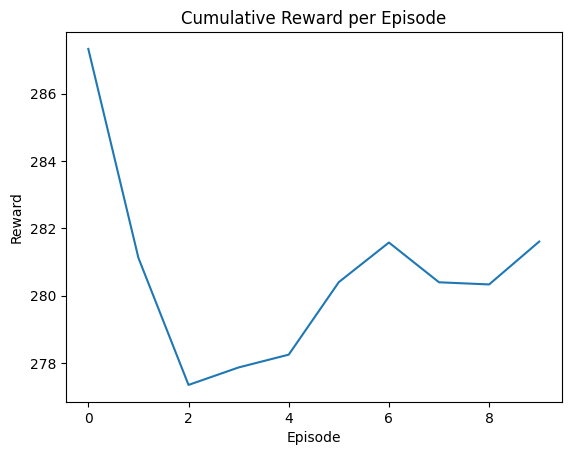

In [22]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

eval_env = gym.make('BipedalWalker-v3')
episodes = 10
rewards = []

for episode in range(episodes):
    try:
        observation, info = eval_env.reset()
    except ValueError:
        observation = eval_env.reset()

    episode_reward = 0
    done = False

    while not done:
        action, _states = model.predict(observation)
        step_result = eval_env.step(action)

        if len(step_result) == 5:
            observation, reward, done, truncated, info = step_result
        else:
            observation, reward, done, info = step_result

        episode_reward += reward

    rewards.append(episode_reward)

avg_reward = np.mean(rewards)
print(f'Average Reward over {episodes} episodes: {avg_reward}')

plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Cumulative Reward per Episode')
plt.show()


In [23]:
import gymnasium as gym
from gymnasium.wrappers import RecordVideo

eval_env = gym.make('BipedalWalker-v3', render_mode='rgb_array')
eval_env = RecordVideo(eval_env, './video', episode_trigger=lambda e: True)

try:
    observation, info = eval_env.reset()
except ValueError:
    observation = eval_env.reset()

done = False

while not done:
    action, _states = model.predict(observation)
    step_result = eval_env.step(action)

    if len(step_result) == 5:
        observation, reward, done, truncated, info = step_result
    else:
        observation, reward, done, info = step_result

eval_env.close()


/usr/local/lib/python3.10/dist-packages/gymnasium/wrappers/rendering.py:282: UserWarning: WARN: Overwriting existing videos at /content/video folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)


Average Reward over 10 episodes: 223.8889206297609


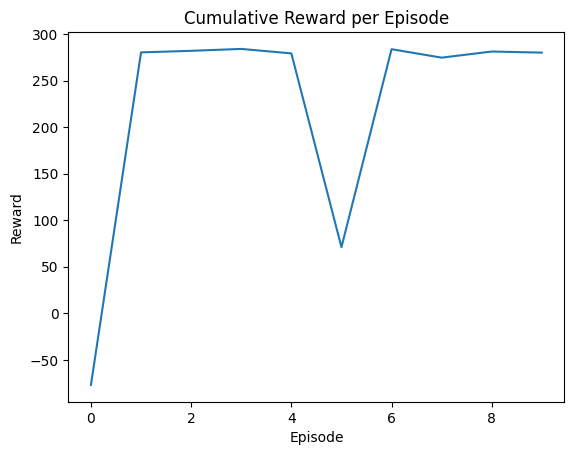

In [24]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

eval_env = gym.make('BipedalWalker-v3')
episodes = 10
rewards = []

for episode in range(episodes):
    try:
        observation, info = eval_env.reset()
    except ValueError:
        observation = eval_env.reset()

    episode_reward = 0
    done = False

    while not done:
        action, _states = model.predict(observation)
        step_result = eval_env.step(action)

        if len(step_result) == 5:
            observation, reward, done, truncated, info = step_result
        else:
            observation, reward, done, info = step_result

        episode_reward += reward

    rewards.append(episode_reward)

avg_reward = np.mean(rewards)
print(f'Average Reward over {episodes} episodes: {avg_reward}')

plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Cumulative Reward per Episode')
plt.show()


saving

In [ ]:
model.save("ppo_bipedalwalker")

loading model

In [29]:

from stable_baselines3 import PPO

model = PPO.load("ppo_bipedalwalker")
